In [76]:
from preamble import *
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import mglearn
import sklearn
%matplotlib inline
# 한글출력 : 한글 출력 시 오류 나면 추가
from matplotlib import font_manager, rc
font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
rc('font',family=font_name)

In [77]:
# from preamble import * %matplotlib inline
# 에러가 나는 것은 예제 폴더가 있는 곳에서 주피터 실행하고,
# matplotlib을 설치하거나 예제 폴더가 있는 곳에서 주피터 실행

from preamble import *
%matplotlib inline
import numpy as np
from scipy import sparse
import matplotlib.pyplot as plt
import pandas as pd

!pip install watermark
# watermark는 시스템 버전을 알려준다. 에러나 나지 않도록 인스톨 필요

In [78]:
%load_ext watermark
%watermark -v -p sklearn,numpy,scipy,matplotlib

The watermark extension is already loaded. To reload it, use:
  %reload_ext watermark
Python implementation: CPython
Python version       : 3.8.5
IPython version      : 7.19.0

sklearn   : 0.23.2
numpy     : 1.19.2
scipy     : 1.5.2
matplotlib: 3.3.2



In [79]:
import sys
print("Python 버전 : ",sys.version)

import pandas as pd
print("pandas 버전 : ", pd.__version__)

import matplotlib
print("matplotlib 버전 : ", matplotlib.__version__)

import numpy as np
print("NumPy 버전 : ", np.__version__)

import scipy as sp
print("SciPy 버전 : ", sp.__version__)

import IPython
print("IPython 버전 : ", IPython.__version__)

import sklearn
print("scikit-learn 버전 : ",sklearn.__version__)

Python 버전 :  3.8.5 (default, Sep  3 2020, 21:29:08) [MSC v.1916 64 bit (AMD64)]
pandas 버전 :  1.1.3
matplotlib 버전 :  3.3.2
NumPy 버전 :  1.19.2
SciPy 버전 :  1.5.2
IPython 버전 :  7.19.0
scikit-learn 버전 :  0.23.2


In [80]:
import os
## os 제어

data = pd.read_csv(os.path.join(mglearn.datasets.DATA_PATH,"adult.data"), header=None, index_col=False,names=['age','workclass','fnlwgt','education','education-num','marital-status','occupation','relationship','race','gender','capital-gain','capital-loss','hours-per-week','native-country','income'])
data = data[['age','workclass','education','gender','hours-per-week','occupation','income']]
display(data.head())

,age,workclass,education,gender,hours-per-week,occupation,income
0,39,State-gov,Bachelors,Male,40,Adm-clerical,<=50K
1,50,Self-emp-not-inc,Bachelors,Male,13,Exec-managerial,<=50K
2,38,Private,HS-grad,Male,40,Handlers-cleaners,<=50K
3,53,Private,11th,Male,40,Handlers-cleaners,<=50K
4,28,Private,Bachelors,Female,40,Prof-specialty,<=50K


In [81]:
print(data.gender.value_counts())

 Male      21790
 Female    10771
Name: gender, dtype: int64


In [82]:
# Dummy 변수 변환
data_dummies = pd.get_dummies(data)
# 범주형데이터 자동변환
features = data_dummies.loc[:,'age':'occupation_ Transport-moving']
# NumPy 배열 추출
X = features.values
y = data_dummies['income_ >50K'].values
print("X.shape: {} y.shape: {}".format(X.shape,y.shape))

X.shape: (32561, 44) y.shape: (32561,)


In [83]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
print("로지스틱 회귀 테스트 점수: {:.2f}".format(logreg.score(X_test, y_test)))

knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train,y_train)

print("knn 테스트 점수 : {:.2f}".format(knn.score(X_test,y_test)))


C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


로지스틱 회귀 테스트 점수: 0.81
knn 테스트 점수 : 0.77


In [84]:
# 숫자 특성과 범주형 문자열 특성을 가진 DataFrame 생성
demo_df = pd.DataFrame({'숫자 특성': [0, 1, 2, 1],'범주형 특성': ['양말', '여우', '양말', '상자']})
display(demo_df)

,숫자 특성,범주형 특성
0,0,양말
1,1,여우
2,2,양말
3,1,상자


In [85]:
display(pd.get_dummies(demo_df))

# 문자열로 바꾸어서 더미함수적용
display(pd.get_dummies(demo_df,columns=['숫자 특성','범주형 특성']))

,숫자 특성,범주형 특성_상자,범주형 특성_양말,범주형 특성_여우
0,0,0,1,0
1,1,0,0,1
2,2,0,1,0
3,1,1,0,0


,숫자 특성_0,숫자 특성_1,숫자 특성_2,범주형 특성_상자,범주형 특성_양말,범주형 특성_여우
0,1,0,0,0,1,0
1,0,1,0,0,0,1
2,0,0,1,0,1,0
3,0,1,0,1,0,0


In [86]:
from sklearn.preprocessing import OneHotEncoder
# sparse=False로 설정하면 OneHotEncoder가 희소 행렬이 아니라 넘파이 배열 반환
ohe = OneHotEncoder(sparse=False)
print(ohe.fit_transform(demo_df))

[[1. 0. 0. 0. 1. 0.]
 [0. 1. 0. 0. 0. 1.]
 [0. 0. 1. 0. 1. 0.]
 [0. 1. 0. 1. 0. 0.]]


In [87]:
# ColumnsTransformer
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler

ct = ColumnTransformer(
    [("scaling",StandardScaler(),['age','hours-per-week']),
     ("onehot",OneHotEncoder(sparse=False),['workclass','education','gender','occupation'])])

In [88]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

# income을 제외한 모든 열 추출
data_features = data.drop("income",axis=1)

# 데이터프레임과 income 분할
X_train,X_test,y_train,y_test = train_test_split(data_features,data.income,random_state=0)
ct.fit(X_train)
X_train_trans = ct.transform(X_train)
print(X_train_trans.shape)

(24420, 44)


In [89]:
logreg = LogisticRegression()
logreg.fit(X_train_trans,y_train)

X_test_trans = ct.transform(X_test)
print("테스트 점수 : {:.2f}".format(logreg.score(X_test_trans,y_test)))

테스트 점수 : 0.81


C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [90]:
# ColumnTransformer 안의 단계 접근시 named_transformers_ 속성 사용
ct.named_transformers_.onehot

OneHotEncoder(sparse=False)

In [91]:
# Make_column_transformer
from sklearn.compose import make_column_transformer

ct = make_column_transformer(
    (StandardScaler(),['age','hours_per_week']),
    (OneHotEncoder(sparse=False),['workclass','education','gender','occupation']))

ct = ColumnTransformer(
    ("scaling",StandardScaler(),['age','hours_per_week']),
    ("onehot",OneHotEncoder(sparse=False),['workclass','education','gender','occupation']))

C:\Users\User\anaconda3\lib\site-packages\sklearn\utils\validation.py:67: FutureWarning: Pass remainder=('onehot', OneHotEncoder(sparse=False), ['workclass', 'education', 'gender', 'occupation']) as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "


lreg socre : 0.63
dreg score : 0.86


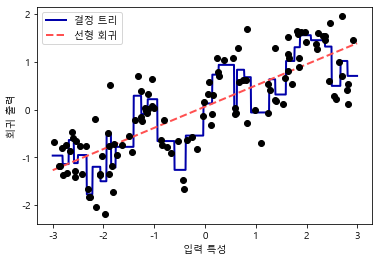

In [209]:
# 구간 분할
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor

X, y = mglearn.datasets.make_wave(n_samples=120)
line = np.linspace(-3,3,1000,endpoint=False).reshape(-1,1)

dreg = DecisionTreeRegressor(min_samples_leaf=3).fit(X,y)
plt.plot(line,dreg.predict(line),label="결정 트리")

lreg = LinearRegression().fit(X,y)
plt.plot(line,lreg.predict(line),'--',label="선형 회귀")

plt.plot(X[:,0],y,'o',c='k')
plt.ylabel("회귀 출력")
plt.xlabel("입력 특성")
plt.legend(loc="best")
print("lreg socre : {:.2f}".format(lreg.score(X,y)))
print("dreg score : {:.2f}".format(dreg.score(X,y)))

In [93]:
from sklearn.preprocessing import KBinsDiscretizer

kb = KBinsDiscretizer(n_bins=10,strategy='uniform',encode='onehot-dense')
kb.fit(X)
X_binned = kb.transform(X)

print(X[:10])

[[-0.753]
 [ 2.704]
 [ 1.392]
 [ 0.592]
 [-2.064]
 [-2.064]
 [-2.651]
 [ 2.197]
 [ 0.607]
 [ 1.248]]


Linear Regression score : 0.72
DecisionTreeRegressor score : 0.72


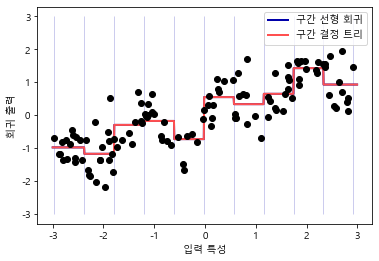

In [95]:
line_binned = kb.transform(line)

lreg = LinearRegression().fit(X_binned,y)
plt.plot(line, lreg.predict(line_binned),label='구간 선형 회귀')

dreg = DecisionTreeRegressor(min_samples_split=3).fit(X_binned,y)
plt.plot(line,dreg.predict(line_binned),label='구간 결정 트리')
plt.plot(X[:,0],y,'o',c='k')
plt.vlines(kb.bin_edges_[0],-3,3,linewidth=1,alpha=.2)
plt.legend(loc="best")
plt.ylabel("회귀 출력")
plt.xlabel("입력 특성")

print("Linear Regression score : {:.2f}".format(lreg.score(X_binned,y)))
print("DecisionTreeRegressor score : {:.2f}".format(dreg.score(X_binned,y)))

In [96]:
X_combined = np.hstack([X,X_binned])
print(X_combined.shape)
print(X_combined[:5])

(120, 11)
[[-0.753  0.     0.     0.     1.     0.     0.     0.     0.     0.
   0.   ]
 [ 2.704  0.     0.     0.     0.     0.     0.     0.     0.     0.
   1.   ]
 [ 1.392  0.     0.     0.     0.     0.     0.     0.     1.     0.
   0.   ]
 [ 0.592  0.     0.     0.     0.     0.     0.     1.     0.     0.
   0.   ]
 [-2.064  0.     1.     0.     0.     0.     0.     0.     0.     0.
   0.   ]]


In [97]:
X_product = np.hstack([X_binned, X * X_binned])
print(X_product.shape)
print(X_product[:5])

(120, 20)
[[ 0.     0.     0.     1.     0.     0.     0.     0.     0.     0.
  -0.    -0.    -0.    -0.753 -0.    -0.    -0.    -0.    -0.    -0.   ]
 [ 0.     0.     0.     0.     0.     0.     0.     0.     0.     1.
   0.     0.     0.     0.     0.     0.     0.     0.     0.     2.704]
 [ 0.     0.     0.     0.     0.     0.     0.     1.     0.     0.
   0.     0.     0.     0.     0.     0.     0.     1.392  0.     0.   ]
 [ 0.     0.     0.     0.     0.     0.     1.     0.     0.     0.
   0.     0.     0.     0.     0.     0.     0.592  0.     0.     0.   ]
 [ 0.     1.     0.     0.     0.     0.     0.     0.     0.     0.
  -0.    -2.064 -0.    -0.    -0.    -0.    -0.    -0.    -0.    -0.   ]]


In [111]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree=10, include_bias=False) #x **10
poly.fit(X)
X_poly = poly.transform(X)
print(X_poly.shape)

(120, 10)


In [101]:
from sklearn.svm import SVR
print("score: {:.2f}".format(lreg.score(X_poly, y))) # 강의 자료 score : 0.73
svr = SVR(gamma=1).fit(X, y)
print("Gamma = 1, score: {:.2f}".format(svr.score(X, y)))
svr = SVR(gamma=10).fit(X, y)
print("Gamma = 10, score: {:.2f}".format(svr.score(X, y)))

score: -133340546.28
Gamma = 1, score: 0.75
Gamma = 10, score: 0.79


In [114]:
# 데이터 변환
rnd = np.random.RandomState(0)
X_org = rnd.normal(size=(1000, 3)) # normal dist. 데이터 1000 by 3
w = rnd.normal(size=3) # w = [ 1.593 0.569 -0.114] 
X = rnd.poisson(10 * np.exp(X_org)) # 포아송 분포데이터 생성
y = np.dot(X_org, w) #원데이터와 w로 y값 생성

print("특성 출현 횟수:\n{}".format(np.bincount(X[:, 0].astype('int'))))

특성 출현 횟수:
[28 38 68 48 61 59 45 56 37 40 35 34 36 26 23 26 27 21 23 23 18 21 10  9
 17  9  7 14 12  7  3  8  4  5  5  3  4  2  4  1  1  3  2  5  3  8  2  5
  2  1  2  3  3  2  2  3  3  0  1  2  1  0  0  3  1  0  0  0  1  3  0  1
  0  2  0  1  1  0  0  0  0  1  0  0  2  2  0  1  1  0  0  0  0  1  1  0
  0  0  0  0  0  0  1  0  0  0  0  0  1  1  0  0  1  0  0  0  0  0  0  0
  1  0  0  0  0  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  1]


In [121]:
# SelectPrecentile
from sklearn.datasets import load_breast_cancer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectPercentile

cancer = load_breast_cancer()
rng = np.random.RandomState(42)

noise = rng.normal(size=(len(cancer.data), 50)) #cancer 데이터에 노이즈 추가
X_w_noise = np.hstack([cancer.data, noise])

X_train, X_test, y_train, y_test = train_test_split(X_w_noise, cancer.target, random_state=0, test_size=.5)

select = SelectPercentile(score_func=f_classif, percentile=50)
select.fit(X_train, y_train)
X_train_selected = select.transform(X_train)

print("X_train.shape : ",X_train.shape)
print("X_train_selected.shape : ", X_train_selected.shape)

X_train.shape :  (284, 80)
X_train_selected.shape :  (284, 40)


In [127]:
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestClassifier

select = SelectFromModel(
    RandomForestClassifier(n_estimators=100, random_state=42),
    threshold="median")

select.fit(X_train, y_train) #Cancer data, 원본 특징 30
X_train_l1 = select.transform(X_train)

print("X_train.shape : ",X_train.shape)
print("X_train_l1.shape : ",X_train_l1.shape)

X_train.shape :  (284, 80)
X_train_l1.shape :  (284, 40)


In [129]:
score = LogisticRegression().fit(X_train, y_train).score(X_test, y_test)
print("Test score: {:.3f}".format(score)) # 강의 자료 score = 0.930
X_test_l1 = select.transform(X_test)
score = LogisticRegression().fit(X_train_l1, y_train).score(X_test_l1, y_test)
print("Test score selected: {:.3f}".format(score)) # 강의 자료 score = 0.951

Test score: 0.916
Test score selected: 0.930


C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i 

In [132]:
from sklearn.feature_selection import RFE

select = RFE(RandomForestClassifier(n_estimators=100, random_state=42),n_features_to_select=40)
select.fit(X_train, y_train)

# 선택된 특성을 표시합니다
mask = select.get_support()

In [133]:
X_train_rfe = select.transform(X_train)
X_test_rfe = select.transform(X_test)
score = LogisticRegression().fit(X_train_rfe, y_train).score(X_test_rfe, y_test)

print("테스트 점수: {:.3f}".format(score)) # 강의 자료 0.951
print("테스트 점수: {:.3f}".format(select.score(X_test, y_test))) #강의 자료 0.951

테스트 점수: 0.930
테스트 점수: 0.951


C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [165]:
from sklearn.model_selection import LeaveOneOut, cross_val_score, KFold
from sklearn.datasets import load_iris

iris = load_iris()
X_train, X_test, y_train, y_test = train_test_split(iris['data'],iris['target'],random_state=21)

logreg = LogisticRegression().fit(X_train, y_train)

print("테스트 세트 점수: {:.2f}".format(logreg.score(X_test, y_test)))

테스트 세트 점수: 0.92


In [168]:
scores = cross_val_score(logreg, iris.data, iris.target, cv=5)
print("교차 검증 점수: {}".format(scores))

교차 검증 점수: [0.967 1.    0.933 0.967 1.   ]


C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [172]:
kfold = KFold(n_splits=3)
print("교차 검증 점수:\n{}".format(
    cross_val_score(logreg, iris.data, iris.target, cv=kfold)))
      
kfold = KFold(n_splits=3, shuffle=True, random_state=0)
print("교차 검증 점수:\n{}".format(
    cross_val_score(logreg, iris.data, iris.target, cv=kfold)))

교차 검증 점수:
[0. 0. 0.]
교차 검증 점수:
[0.98 0.96 0.96]


C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i 

In [182]:
from sklearn.model_selection import ShuffleSplit

shuffle_split = ShuffleSplit(test_size=.5, train_size=.5, n_splits=10)
scores = cross_val_score(logreg, iris.data, iris.target, cv=shuffle_split)
print("교차 검증 점수:\n{}".format(scores))

from sklearn.model_selection import StratifiedShuffleSplit

shuffle_split = StratifiedShuffleSplit(test_size=.5, train_size=.5, n_splits=10)
scores = cross_val_score(logreg, iris.data, iris.target, cv=shuffle_split)
print("교차 검증 점수:\n{}".format(scores))

C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i 

교차 검증 점수:
[0.973 0.96  0.973 0.973 0.96  0.973 0.973 0.947 0.947 0.973]
교차 검증 점수:
[0.96  0.947 0.987 0.96  0.947 0.96  0.987 0.933 0.96  0.947]


C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [188]:
from sklearn.model_selection import GroupKFold
from sklearn.datasets import make_blobs

X, y = make_blobs(n_samples=12, random_state=0)
groups = [0, 0, 0, 1, 1, 1, 1, 2, 2, 3, 3, 3]
scores = cross_val_score(logreg, X, y, groups, cv=GroupKFold(n_splits=3))
print("교차 검증 점수:\n{}".format(scores))

C:\Users\User\anaconda3\lib\site-packages\sklearn\utils\validation.py:67: FutureWarning: Pass groups=[0, 0, 0, 1, 1, 1, 1, 2, 2, 3, 3, 3] as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "


교차 검증 점수:
[0.75  0.6   0.667]


In [191]:
from sklearn.svm import SVC

X_trainval, X_test, y_trainval, y_test = train_test_split(iris.data, iris.target, random_state=0)
X_train, X_valid, y_train, y_valid = train_test_split(X_trainval, y_trainval, random_state=1)

In [198]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100],
               'gamma': [0.001, 0.01, 0.1, 1, 10, 100]}
    
grid_search = GridSearchCV(SVC(), param_grid, cv=5, return_train_score=True)
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, random_state=0)
grid_search.fit(X_train, y_train)

print("테스트 세트 점수: {:.2f}".format(grid_search.score(X_test, y_test)))

print("최적 매개변수: {}".format(grid_search.best_params_))

print("최고 교차 검증 점수: {:.2f}".format(grid_search.best_score_))

print("최고 성능 모델:\n{}".format(grid_search.best_estimator_))

테스트 세트 점수: 0.97
최적 매개변수: {'C': 10, 'gamma': 0.1}
최고 교차 검증 점수: 0.97
최고 성능 모델:
SVC(C=10, gamma=0.1)


In [199]:
results = pd.DataFrame(grid_search.cv_results_)
display(np.transpose(results.head()))

,0,1,2,3,4
mean_fit_time,0.00059,0.0008,0.00061,0.0004,0.0008
std_fit_time,0.00048,0.0004,0.00049,0.00049,0.0004
mean_score_time,0.00039,0,0.0002,0.0002,0.0002
std_score_time,0.00048,0,0.0004,0.0004,0.0004
param_C,0.001,0.001,0.001,0.001,0.001
param_gamma,0.001,0.01,0.1,1,10
params,"{'C': 0.001, 'gamma': 0.001}","{'C': 0.001, 'gamma': 0.01}","{'C': 0.001, 'gamma': 0.1}","{'C': 0.001, 'gamma': 1}","{'C': 0.001, 'gamma': 10}"
split0_test_score,0.35,0.35,0.35,0.35,0.35
split1_test_score,0.35,0.35,0.35,0.35,0.35
split2_test_score,0.36,0.36,0.36,0.36,0.36


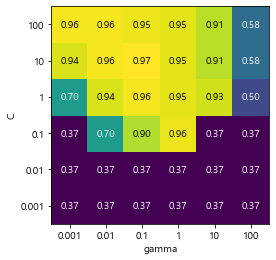

In [202]:
scores = np.array(results.mean_test_score).reshape(6, 6)
mglearn.tools.heatmap(scores, xlabel='gamma', xticklabels=param_grid['gamma'],
 ylabel='C', yticklabels=param_grid['C'], cmap="viridis")

In [203]:
param_grid = [{'kernel': ['rbf'], 'C': [0.001, 0.01, 0.1, 1, 10, 100],
               'gamma': [0.001, 0.01, 0.1, 1, 10, 100]},
              {'kernel': ['linear'], 'C': [0.001, 0.01, 0.1, 1, 10, 100]}]

print("그리드 목록:\n{}".format(param_grid))

grid_search = GridSearchCV(SVC(), param_grid, cv=5, return_train_score=True)
grid_search.fit(X_train, y_train)
print("최적 파라미터: {}".format(grid_search.best_params_))
print("최고 교차 검증 점수: {:.2f}".format(grid_search.best_score_))

그리드 목록:
[{'kernel': ['rbf'], 'C': [0.001, 0.01, 0.1, 1, 10, 100], 'gamma': [0.001, 0.01, 0.1, 1, 10, 100]}, {'kernel': ['linear'], 'C': [0.001, 0.01, 0.1, 1, 10, 100]}]
최적 파라미터: {'C': 10, 'gamma': 0.1, 'kernel': 'rbf'}
최고 교차 검증 점수: 0.97


In [204]:
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100],'gamma': [0.001, 0.01, 0.1, 1, 10, 100]}
scores = cross_val_score(GridSearchCV(SVC(), param_grid, cv=5),iris.data, iris.target, cv=5)

print("교차 검증 점수: ", scores)
print("교차 검증 평균 점수: ", scores.mean())
print(param_grid)

교차 검증 점수:  [0.967 1.    0.967 0.967 1.   ]
교차 검증 평균 점수:  0.9800000000000001
{'C': [0.001, 0.01, 0.1, 1, 10, 100], 'gamma': [0.001, 0.01, 0.1, 1, 10, 100]}


In [206]:
# 불균형 데이터
from sklearn.datasets import load_digits

digits = load_digits()
y = digits.target == 9 # 9는 true, 나머지는 false (1:9의 불균형 데이터)
X_train, X_test, y_train, y_test = train_test_split(digits.data, y, random_state=0)

from sklearn.dummy import DummyClassifier

dummy_majority = DummyClassifier(strategy='most_frequent').fit(X_train, y_train)
pred_most_frequent = dummy_majority.predict(X_test)
print("예측된 레이블의 빈도 높은 값: {}".format(np.unique(pred_most_frequent)))
print("테스트 점수: {:.2f}".format(dummy_majority.score(X_test, y_test)))

예측된 레이블의 빈도 높은 값: [False]
테스트 점수: 0.90


In [212]:
from sklearn.tree import DecisionTreeClassifier

tree = DecisionTreeClassifier(max_depth=2).fit(X_train, y_train)
pred_tree = tree.predict(X_test)
print("테스트 점수: {:.2f}".format(tree.score(X_test, y_test)))

dummy = DummyClassifier().fit(X_train, y_train) # 훈련세트와 같은 비율 예측
pred_dummy = dummy.predict(X_test)
print("dummy 점수: {:.2f}".format(dummy.score(X_test, y_test)))

logreg = LogisticRegression(C=0.1).fit(X_train, y_train)
pred_logreg = logreg.predict(X_test)
print("logreg 점수: {:.2f}".format(logreg.score(X_test, y_test)))

테스트 점수: 0.92
dummy 점수: 0.80
logreg 점수: 0.98


C:\Users\User\anaconda3\lib\site-packages\sklearn\dummy.py:131: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  warnings.warn("The default value of strategy will change from "
C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [213]:
# 혼동행렬
from sklearn.metrics import confusion_matrix
confusion = confusion_matrix(y_test, pred_logreg)
print("오차 행렬:\n{}".format(confusion))

오차 행렬:
[[402   1]
 [  6  41]]


In [214]:
# F-score(measure)
from sklearn.metrics import f1_score

print("빈도 기반 더미 모델의 f1 score: {:.2f}".format(f1_score(y_test, pred_most_frequent)))
print("무작위 더미 모델의 f1 score: {:.2f}".format(f1_score(y_test, pred_dummy)))
print("트리 모델의 f1 score: {:.2f}".format(f1_score(y_test, pred_tree)))
print("로지스틱 회귀 모델의 f1 score: {:.2f}".format(f1_score(y_test, pred_logreg)))

빈도 기반 더미 모델의 f1 score: 0.00
무작위 더미 모델의 f1 score: 0.15
트리 모델의 f1 score: 0.55
로지스틱 회귀 모델의 f1 score: 0.92


In [215]:
# Classification report
from sklearn.metrics import classification_report

print(classification_report(y_test, pred_most_frequent, target_names=["9 아님", "9"]))

              precision    recall  f1-score   support

        9 아님       0.90      1.00      0.94       403
           9       0.00      0.00      0.00        47

    accuracy                           0.90       450
   macro avg       0.45      0.50      0.47       450
weighted avg       0.80      0.90      0.85       450



C:\Users\User\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [219]:
# 분류의 기본 평가 지표는 정확도
print("기본 평가 지표: {}".format(cross_val_score(SVC(), digits.data, digits.target == 9)))

# scoring="accuracy"의 결과는 동일
explicit_accuracy = cross_val_score(SVC(), digits.data, digits.target == 9,scoring="accuracy")
print("정확도 지표: {}".format(explicit_accuracy))
roc_auc = cross_val_score(SVC(), digits.data, digits.target == 9,scoring="roc_auc") #roc_auc_score()의미
print("AUC 지표: {}".format(roc_auc))

기본 평가 지표: [0.975 0.992 1.    0.994 0.981]
정확도 지표: [0.975 0.992 1.    0.994 0.981]
AUC 지표: [0.997 0.999 1.    1.    0.984]
